In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#download haberman dataset from https://www.kaggle.com/gilsousa/habermans-survival-data-set
df = pd.read_csv('haberman_csv.csv')

'''To take a closer look at the data took help of “ .head()”function of pandas library which returns first five observations of the data set.
Similarly “.tail()” returns last five observations of the data set'''
df.head()

,Age_of_patient_at_time_of_operation,Patients_year_of_operation,Number_of_positive_axillary_nodes_detected,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [9]:
#found out the total number of rows and columns in the data set using “.shape”.
df.shape

(306, 4)

#### Observations
- Dataset comprises of 306 observations and 4 characteristics.
- Out of which one is dependent variable and rest 3 are independent variables.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age_of_patient_at_time_of_operation           306 non-null int64
Patients_year_of_operation                    306 non-null int64
Number_of_positive_axillary_nodes_detected    306 non-null int64
Survival_status                               306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


#### Observations
- Data has only integer values
- no variable column has null/missing values
- The datatype of the status is an integer, it has to be converted to a categorical datatype
- In the status column, the value 1 can be mapped to ‘yes’ which means the patient has survived 5 years or longer. And the value 2 can be mapped to ‘no’ which means the patient died within 5 years

In [33]:
'''The describe() function in pandas is very handy in getting various summary statistics.
This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.
'''
df['Survival_status'] = df['Survival_status'].map({1:'Yes',2:'No'})
df.describe()

,Age_of_patient_at_time_of_operation,Patients_year_of_operation,Number_of_positive_axillary_nodes_detected
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


#### Observations
- Mean value is greater than median value of each column which is represented by 50%(50 percentile) in index column
- There is notable difference between 75%tile and max values of 'Age_of_patient_at_time_of_operation' and 'Number_of_positive_axillary_nodes_detected' .
- observations 1 and 2 indicate there are extreme outliers in our dataset.

In [34]:
df.Survival_status.unique()

array(['Yes', 'No'], dtype=object)

In [35]:
df.Survival_status.value_counts()

Yes    225
No      81
Name: Survival_status, dtype: int64

#### Observations
- Data is categorical in nature where Yes indicates patient survived more than 5 years and No indicates patient didnt survive more than 5 years.
- this is unbalanced dataset


# Bivariate Analysis

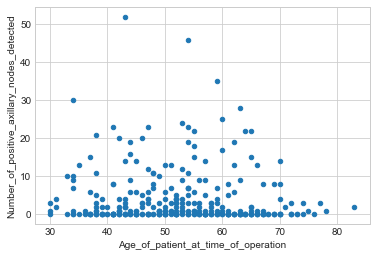

In [37]:
#2-D scatter plot:
#ALWAYS understand the axis: labels and scale.


df.plot(kind='scatter', x='Age_of_patient_at_time_of_operation', y='Number_of_positive_axillary_nodes_detected') 
plt.show()

#cannot make much sense out it. 

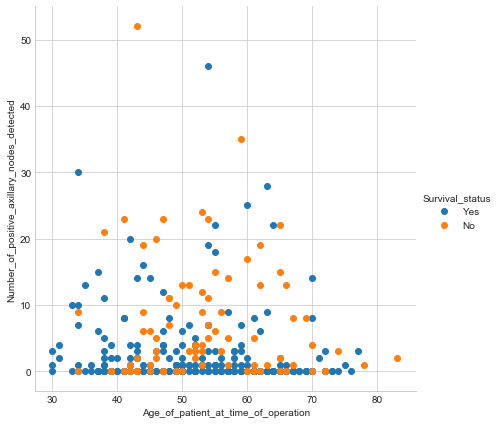

In [38]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="Survival_status", size=6) \
   .map(plt.scatter, "Age_of_patient_at_time_of_operation", "Number_of_positive_axillary_nodes_detected") \
   .add_legend()
plt.show()

#### Observations:
- There are hardly any patients with nodes more than 25
- Patients with  age more than 50 having nodes more than 10 are less likely to survive.


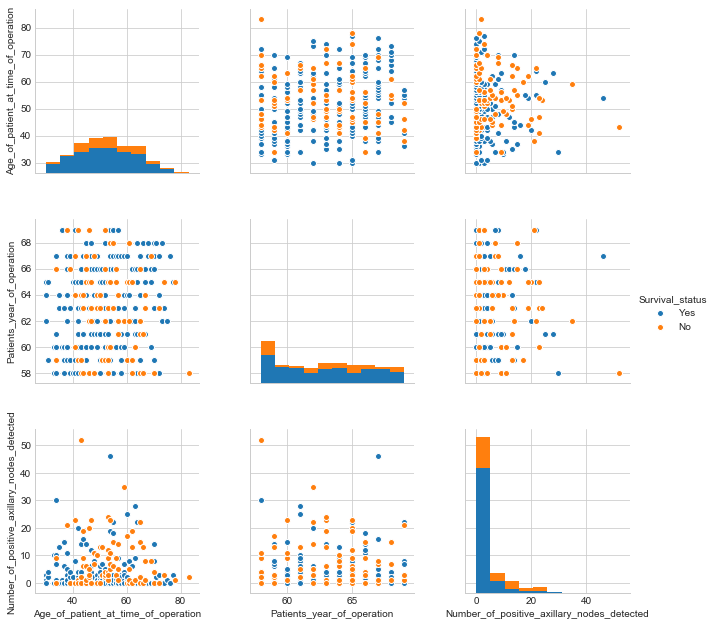

In [36]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, hue="Survival_status", size=3)
plt.show()
# NOTE: the diagnol elements are PDFs for each feature.

#### Observations

- Plot for age vs nodes distinguishes features better comparitively than other plots.

# Univariate Analysis

## PDF

In [41]:
import warnings
warnings.simplefilter('ignore')

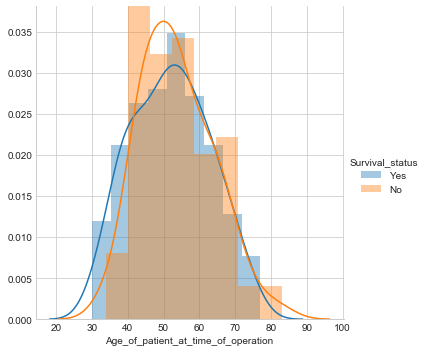

In [42]:
sns.FacetGrid(df, hue="Survival_status", size=5) \
   .map(sns.distplot, "Age_of_patient_at_time_of_operation") \
   .add_legend();
plt.show();

#### Observations
- Major overlapping is observed which tells us that survival chances are irrespective of persons age .
- We cannot conclude survival status of patient just by considering age parameter

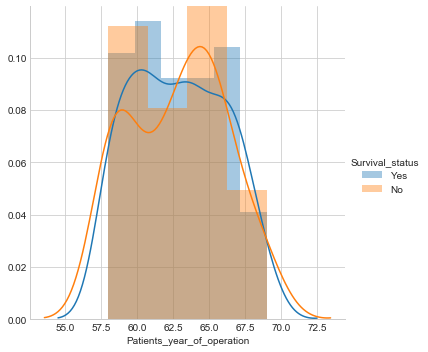

In [43]:
sns.FacetGrid(df, hue="Survival_status", size=5) \
   .map(sns.distplot, "Patients_year_of_operation") \
   .add_legend();
plt.show();

#### Observations
- Major overelapping is observed .
- year 1960 - 1965 had the most unssuccessful operations 
- We cannot determine conclusion based on this parameter

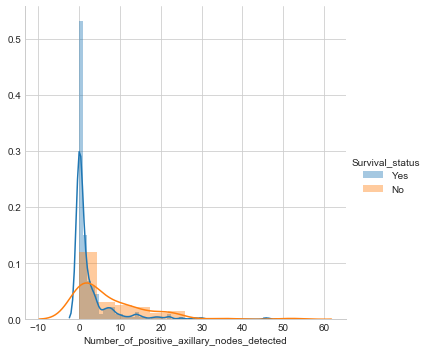

In [44]:
sns.FacetGrid(df, hue="Survival_status", size=5) \
   .map(sns.distplot, "Number_of_positive_axillary_nodes_detected") \
   .add_legend();
plt.show();

#### Observations

- As number of auxillary nodes are increasing , survival rate decreases. 
- Patient with 0 node or 1 nodes have higher chances of survival . Patient with nodes more than 20 have lower chances of survival.



## CDF

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


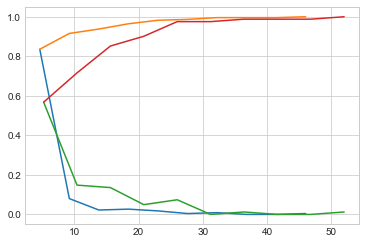

In [51]:
#So from above PDF we can say the patients survival status, 
#but we cannot exactly say what percentage of patient will actually short survive or long survive. 
#To know that we have another distribution that is CDF.

df_Long_Survive = df.loc[df['Survival_status'] == 'Yes']
df_Short_Survive = df.loc[df['Survival_status'] == 'No']
counts, bin_edges = np.histogram(df_Long_Survive['Number_of_positive_axillary_nodes_detected'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(df_Short_Survive['Number_of_positive_axillary_nodes_detected'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

#### Observations

- There is 85% chances of long survival if number of nodes is less than 5.
- There is 100% chance of short survival if number of nodes is greater than 40

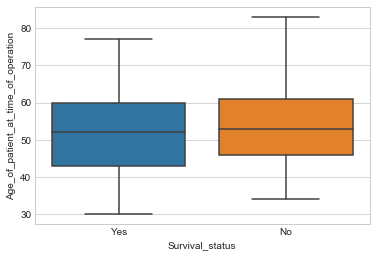

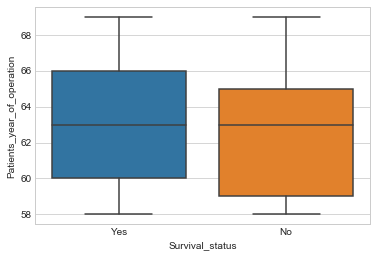

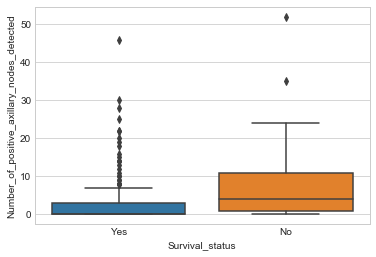

In [52]:
sns.boxplot(x='Survival_status',y='Age_of_patient_at_time_of_operation',data=df)
plt.show()
sns.boxplot(x='Survival_status',y='Patients_year_of_operation',data=df)
plt.show()
sns.boxplot(x='Survival_status',y='Number_of_positive_axillary_nodes_detected',data=df)
plt.show()

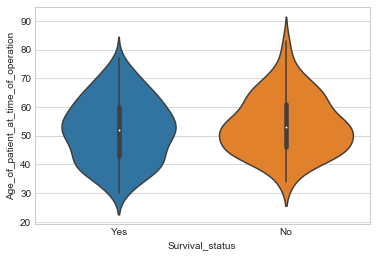

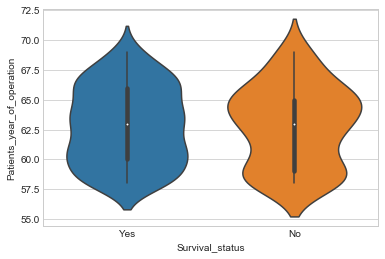

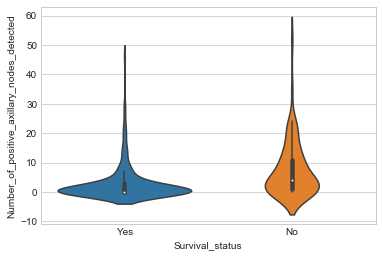

In [54]:
sns.violinplot(x='Survival_status',y='Age_of_patient_at_time_of_operation',data=df)
plt.show()
sns.violinplot(x='Survival_status',y='Patients_year_of_operation',data=df)
plt.show()
sns.violinplot(x='Survival_status',y='Number_of_positive_axillary_nodes_detected',data=df)
plt.show()

#### Observations

- if number of nodes is greater than 1 , chances of short survival is more 
- A large percentage of patients who survived had 0 nodes. Yet there is a small percentage of patients who had no positive axillary nodes died within 5 years of operation, thus an absence of positive axillary nodes cannot always guarantee survival.

# Multivariate Analysis

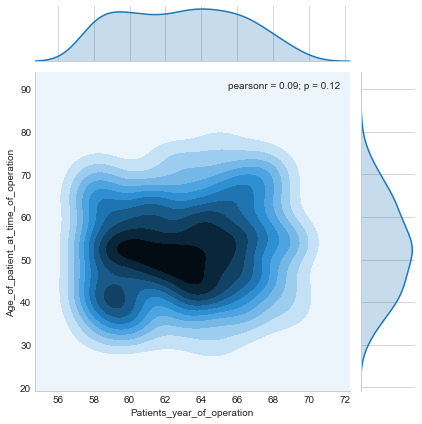

In [58]:
# Contour Plot

sns.jointplot(x = 'Patients_year_of_operation', y = 'Age_of_patient_at_time_of_operation', data = df, kind ='kde')
plt.show()

#### Observations
- From 1960 to 1964, more operations done on the patients in the age group 45 to 55.

# Conclusions

- Age and Year of operations doesnt give enough data to be deciding factor to classify Survival Status of patient, although patient less than 35 years of age have higher chance of survival .

- Number of nodes is inversely proportional to chances of survival. 

- Dataset is imbalanced , which makes objective of classifying data difficult.